# Debugging Ulmo on 2020s

In [32]:
# imports
import os
import numpy as np 

import h5py

from ulmo import io as ulmo_io
from ulmo.plotting import plotting
from ulmo.utils import image_utils

# Load Table

In [23]:
modis_2020s = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_20202021.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_20202021.parquet


# Grab a high DT

In [24]:
modis_2020s['DT'] = modis_2020s.T90 - modis_2020s.T10

In [25]:
highDT_idx = np.where(modis_2020s.DT > 5.)[0]

In [26]:
modis_2020s.iloc[highDT_idx[0]]

filename            /tank/xavier/Oceanography/data/MODIS/SST/night...
row                                                               127
col                                                               554
lat                                                        -34.933342
lon                                                         22.407885
clear_fraction                                               0.049805
field_size                                                        128
datetime                                          2020-04-30 23:40:00
ex_filename         s3://modis-l2/Extractions/MODIS_R2019_2020_95c...
pp_file             s3://modis-l2/PreProc/MODIS_R2019_2020_95clear...
pp_root                                                      standard
pp_idx                                                           2288
pp_type                                                             0
mean_temperature                                            19.330912
Tmin                

# Show it

## Load

In [27]:
cutout = modis_2020s.iloc[highDT_idx[0]]
#local_file = os.path.join(os.getenv('SST_OOD'), 'MODIS_L2', 'PreProc', cutout.pp_file)
local_file = '/tank/xavier/Oceanography/Python/ulmo/ulmo/runs/SSL/MODIS/v4/PreProc/MODIS_R2019_2020_95clear_128x128_preproc_standard.h5'
img0 =  image_utils.grab_image(cutout, local_file=local_file)

In [40]:
cutout

filename            /tank/xavier/Oceanography/data/MODIS/SST/night...
row                                                               127
col                                                               554
lat                                                        -34.933342
lon                                                         22.407885
clear_fraction                                               0.049805
field_size                                                        128
datetime                                          2020-04-30 23:40:00
ex_filename         s3://modis-l2/Extractions/MODIS_R2019_2020_95c...
pp_file             s3://modis-l2/PreProc/MODIS_R2019_2020_95clear...
pp_root                                                      standard
pp_idx                                                           2288
pp_type                                                             0
mean_temperature                                            19.330912
Tmin                

## Show

<AxesSubplot:>

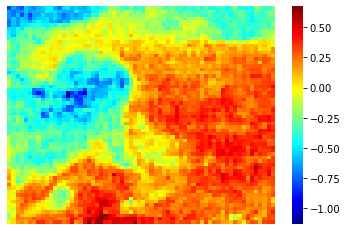

In [28]:
plotting.show_image(img0)

In [29]:
img0.max() - img0.min()

1.8008881

----

# Check Extraction

In [31]:
extract_file = '/tank/xavier/Oceanography/Python/ulmo/ulmo/runs/SSL/MODIS/v4/Extract/MODIS_R2019_2020_95clear_128x128_inpaintT.h5'

In [33]:
f_ex = h5py.File(extract_file, 'r')
f_ex.keys()

<KeysViewHDF5 ['fields', 'masks', 'metadata']>

In [34]:
f_ex['fields'].shape

(627132, 128, 128)

In [35]:
e0 = f_ex['fields'][0,...]

<AxesSubplot:>

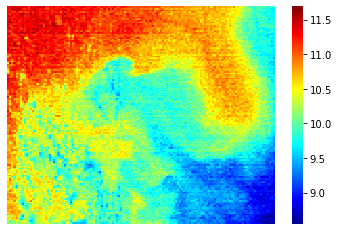

In [36]:
plotting.show_image(e0)

## Check meta

In [37]:
modis_2020s.iloc[0]

filename            /tank/xavier/Oceanography/data/MODIS/SST/night...
row                                                              1296
col                                                               261
lat                                                          41.75395
lon                                                         -125.5704
clear_fraction                                               0.036377
field_size                                                        128
datetime                                          2020-03-13 10:05:00
ex_filename         s3://modis-l2/Extractions/MODIS_R2019_2020_95c...
pp_file             s3://modis-l2/PreProc/MODIS_R2019_2020_95clear...
pp_root                                                      standard
pp_idx                                                              0
pp_type                                                             0
mean_temperature                                            10.258268
Tmin                

## Back to the high $\Delta T$ case

In [38]:
e2288 = f_ex['fields'][2288,...]

<AxesSubplot:>

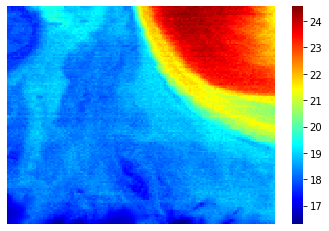

In [39]:
plotting.show_image(e2288)

## Check pp_file

In [42]:
pp_file = '/tank/xavier/Oceanography/Python/ulmo/ulmo/runs/SSL/MODIS/v4/old_PreProc/MODIS_R2019_2020_95clear_128x128_preproc_standard.h5'

In [44]:
f_pp = h5py.File(pp_file, 'r')
f_pp.keys()

<KeysViewHDF5 ['valid', 'valid_metadata']>

In [46]:
pp_2288 = f_pp['valid'][2288,0,...]
pp_2288.shape

(64, 64)

<AxesSubplot:>

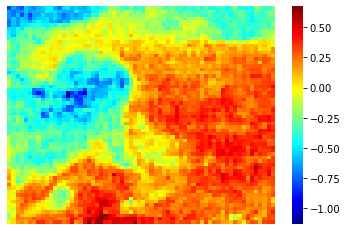

In [47]:
plotting.show_image(pp_2288)

## Check debug pp_file

In [48]:
pp_debug_file = '/tank/xavier/Oceanography/Python/ulmo/ulmo/runs/SSL/MODIS/v4/PreProc/MODIS_R2019_2020_95clear_128x128_preproc_standard.h5'

In [50]:
f_pp_d = h5py.File(pp_debug_file, 'r')

In [51]:
pp_d_2288 = f_pp_d['valid'][2288,0,...]
pp_d_2288.shape

(64, 64)

<AxesSubplot:>

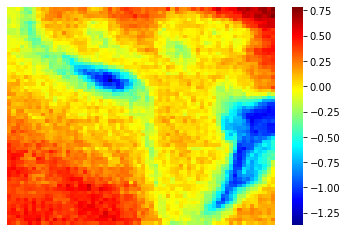

In [52]:
plotting.show_image(pp_d_2288)

In [53]:
f_pp_d.close()

## Further checking

In [54]:
modis_debug = ulmo_io.load_main_table('/tank/xavier/Oceanography/Python/ulmo/ulmo/runs/SSL/MODIS/v4/preproc_debug.parquet')

Read main table: /tank/xavier/Oceanography/Python/ulmo/ulmo/runs/SSL/MODIS/v4/preproc_debug.parquet


In [55]:
modis_debug['DT'] = modis_debug.T90 - modis_debug.T10

In [56]:
highDTd_idx = np.where(modis_debug.DT > 5.)[0]

In [57]:
modis_debug.iloc[highDTd_idx[0]]

filename            /tank/xavier/Oceanography/data/MODIS/SST/night...
row                                                               127
col                                                               554
lat                                                        -34.933342
lon                                                         22.407885
clear_fraction                                               0.049805
field_size                                                        128
datetime                                          2020-04-30 23:40:00
ex_filename         s3://modis-l2/Extractions/MODIS_R2019_2020_95c...
pp_file             s3://modis-l2/PreProc/MODIS_R2019_2020_95clear...
pp_root                                                      standard
pp_idx                                                          10667
pp_type                                                             0
mean_temperature                                            19.330912
Tmin                

In [58]:
cutout = modis_debug.iloc[highDTd_idx[0]]
#local_file = os.path.join(os.getenv('SST_OOD'), 'MODIS_L2', 'PreProc', cutout.pp_file)
local_file = '/tank/xavier/Oceanography/Python/ulmo/ulmo/runs/SSL/MODIS/v4/PreProc/MODIS_R2019_2020_95clear_128x128_preproc_standard.h5'
img0 =  image_utils.grab_image(cutout, local_file=local_file)

<AxesSubplot:>

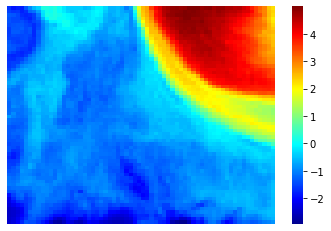

In [59]:
plotting.show_image(img0)